In [312]:
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

user_df = pd.read_csv('./cvs_users.csv',encoding='euc-kr')
print(user_df.head())

    idUser Gender  Age
0  U100001     남성   43
1  U100002     여성   35
2  U100003     남성   34
3  U100004     남성   38
4  U100005     여성   37


In [313]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idUser  1098 non-null   object
 1   Gender  1098 non-null   object
 2   Age     1098 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.9+ KB


In [314]:
# 결측치 확인
user_df['Gender'].unique()

array(['남성', '여성'], dtype=object)

In [315]:
user_df['idUser'].unique()

array(['U100001', 'U100002', 'U100003', ..., 'U101096', 'U101097',
       'U101098'], dtype=object)

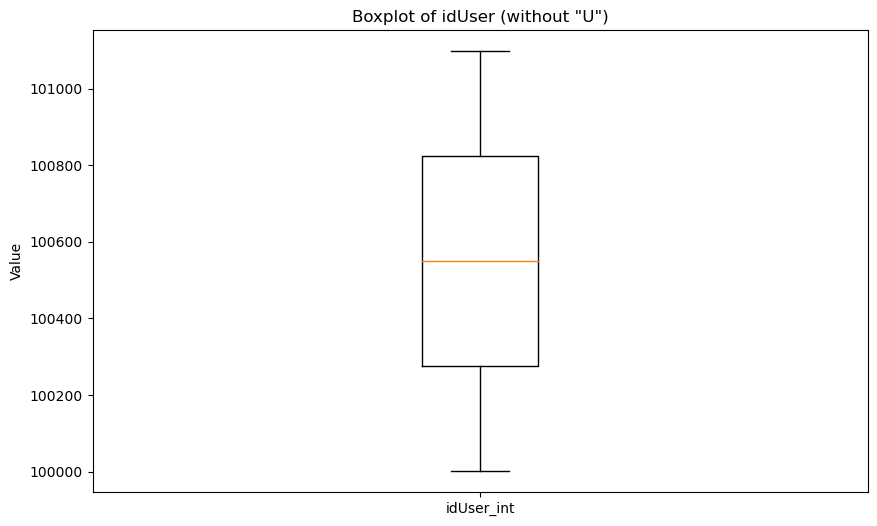

In [316]:
# 'idUser'에서 'U' 문자 제거 후 정수형으로 변환
user_df['idUser_int'] = user_df['idUser'].str.replace('U', '').astype(int)

# 박스플롯 생성을 위한 코드
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.boxplot(user_df['idUser_int'])  # 박스플롯 생성
plt.title('Boxplot of idUser (without "U")')  # 그래프 제목
plt.ylabel('Value')  # y축 레이블
plt.xticks([1], ['idUser_int'])  # x축 레이블
plt.show()

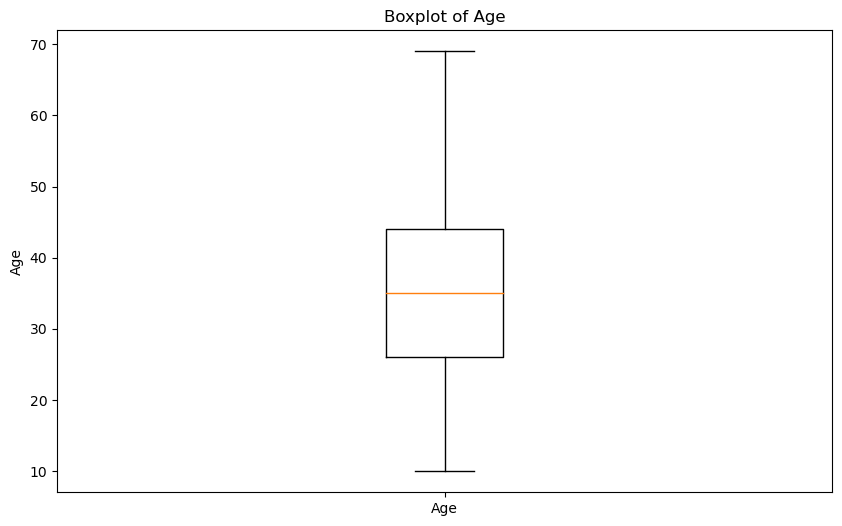

In [317]:
# 박스플롯 생성을 위한 코드
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.boxplot(user_df['Age'])  # 박스플롯 생성
plt.title('Boxplot of Age')  # 그래프 제목
plt.ylabel('Age')  # y축 레이블
plt.xticks([1], ['Age'])  # x축 레이블
plt.show()

In [318]:
user_df['Gender'].value_counts()

남성    731
여성    367
Name: Gender, dtype: int64

In [319]:
user_df[user_df.duplicated()]

,idUser,Gender,Age,idUser_int


In [320]:
user_df[(user_df['Age']>19) & (user_df['Age']<30)]

,idUser,Gender,Age,idUser_int
6,U100007,여성,20,100007
10,U100011,남성,27,100011
20,U100021,남성,22,100021
22,U100023,남성,20,100023
29,U100030,남성,26,100030
...,...,...,...,...
1080,U101081,남성,26,101081
1086,U101087,여성,25,101087
1088,U101089,남성,27,101089
1091,U101092,여성,25,101092


In [321]:
# item_df
item_df = pd.read_csv('./cvs_items.csv')
print(item_df.head())

  ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
0          L1          간편식사           M1            도시락  I-8801068371857   
1          L1          간편식사           M1            도시락  I-8801068371864   
2          L1          간편식사           M1            도시락  I-8801068378887   
3          L1          간편식사           M1            도시락  I-8801068388664   
4          L1          간편식사           M1            도시락  I-8801068389340   

      ItemName Item_CatORMaker  Price  \
0    샐)치킨찹찹샐러드             샐러드   3500   
1   샐)퀴노아바질샐러드             샐러드   3500   
2  샐)에그가먼저닭샐러드             샐러드   3500   
3   샐)흑임자치킨샐러드             샐러드   3500   
4    면)나폴리탄파스타               면   4000   

                                            ImageUrl  
0  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
1  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
2  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
3  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
4  https://tqklhszfkv

In [322]:
item_df['ImageUrl'][0]

'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8801068371857.jpg'

In [323]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ItemIdLarge      4308 non-null   object
 1   ItemNameLarge    4308 non-null   object
 2   ItemIdMiddle     4308 non-null   object
 3   ItemNameMiddle   4308 non-null   object
 4   ItemId           4308 non-null   object
 5   ItemName         4308 non-null   object
 6   Item_CatORMaker  4291 non-null   object
 7   Price            4308 non-null   int64 
 8   ImageUrl         4308 non-null   object
dtypes: int64(1), object(8)
memory usage: 303.0+ KB


In [324]:
item_l = item_df[item_df['Item_CatORMaker'].isna()]['ItemName'].tolist()
for item in item_l:
    print(item_df[item_df['ItemName']==item])


    ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
589          L3           과자류           M1            스낵/  I-8801062879090   

       ItemName Item_CatORMaker  Price  \
589  ABC초코쿠키쿠앤크             NaN   1000   

                                              ImageUrl  
589  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
     ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
1396          L3           과자류           M3            껌/초  I-2201148612355   

     ItemName Item_CatORMaker  Price  \
1396    푸쉬팝캔디             NaN   1200   

                                               ImageUrl  
1396  http://cdn2.bgfretail.com/bgfbrand/files/produ...  
     ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
1457          L3           과자류           M3            껌/초  I-6934290104152   

     ItemName Item_CatORMaker  Price  \
1457  주사위팝33g             NaN   1200   

                                               I

In [325]:
value_list = item_df[item_df['ItemName'].duplicated()]['ItemName'].tolist()
for item in value_list:
    print(item_df[item_df['ItemName']==item])
    print(item_df[item_df['ItemName']==item]['ImageUrl'].values)
    print(item_df[item_df['ItemName']==item]['Price'].values)

    ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
94           L1          간편식사           M2            샌드위  I-8801068386912   
108          L1          간편식사           M2            샌드위  I-8801068396768   

        ItemName Item_CatORMaker  Price  \
94   햄)에그불고기치즈버거             햄버거   2300   
108  햄)에그불고기치즈버거             햄버거   2300   

                                              ImageUrl  
94   https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
108  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
['https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8801068386912.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8801068396768.jpg']
[2300 2300]
    ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
96           L1          간편식사           M2            샌드위  I-8801068388466   
109          L1          간편식사           M2            샌드위  I-8801068396782   

      ItemName Item_CatORMaker  Price  \
96   햄)콰트로타워버거             햄버거 

In [326]:
item_df['Item_CatORMaker'].unique()

array(['샐러드', '면', '주먹밥', '도시락', '찬', 'NCT', '김밥', '간편', '편스', '햄버거',
       '샌드위', '피자', '지지', '핫도그', '요리비', '튀김', '그릴', '즉석', '오뎅', '삼진',
       '즉석빵', '도너츠', 'GET', '로아카', '팝콘', '미성', '아띠', '거림', '티디', '헬로',
       '매크로', '여리수', '초코', '로투', '로투스', '서영', '명도', '푸드', '아미카', '매크',
       '해태', 'HEYROO', '동서', '농심', '오뚜기', '동원', '롯데', nan, '삼양', '켈로그',
       '크라운', '오리온', '매일', '청우', '서주', '대산', '코스', '동화', '미찌', '제이',
       '큐피트', '씨알', '비알', '해광', '네슬', '엠탑', '팔도', '프링글', 'ZOTT', '오레오',
       '서석', '삼립', '돈쯔동', 'CJ', '실속', '삼립미', '쿠키런', '엠즈', '유라가', '연세',
       '새롬', '신라', '대두', '풍림', '뚜또', '돌', '프랑', '에버', '브레드', '조이', '푸드냉',
       '징코', '엉덩이', '피오레', '피오', '끼리냉', '참조은', '아워홈', 'PLA', '테디베', '에프비',
       '신세계', '에이치', '마즈', '네슬레', '로아커', '델리팜', '삼경', '일신', '예스', '모리',
       'SCD', 'SCK', '나무', '코코', '대진', '몽뜨', '흥양', '웅진', '대영', '에이원',
       '동아', '고려', '경남', '씨믹스', '삼광', '빙', '씨믹', 'IEK', '벤앤제', '하겐',
       '초이스', '유니', '나뚜루', '에스카', '빙그레', '롯데푸', '야쿠', '담터', '라벨리', '버윈',
 

In [327]:
# '샌드위',
# '지지','GG'
# '씨즈','씨' 
# '은하수','은하'
# '서울F&B','서울FB'
# '모구','모구모'
# '20델', '21델', '22del', 'del'
# '20' -> 'HEYROO'
# '피오레','피오'

print(item_df[item_df['Item_CatORMaker']=='20델'])
print(item_df[item_df['Item_CatORMaker']=='로아커']['ImageUrl'].values)
# print(item_df[item_df['Item_CatORMaker']=='피오']['ImageUrl'].values)

     ItemIdLarge ItemNameLarge ItemIdMiddle ItemNameMiddle           ItemId  \
4116          L6            음료           M2            아이스  I-8801223009564   
4132          L6            음료           M2            아이스  I-8808024028022   
4133          L6            음료           M2            아이스  I-8808024028046   
4147          L6            음료           M2            아이스  I-8809184806475   

          ItemName Item_CatORMaker  Price  \
4116     20델)수박에이드             20델    700   
4132   20델)블랙아메리카노             20델    700   
4133  20델)빅블랙아메리카노             20델   1000   
4147     20델)홍시에이드             20델    700   

                                               ImageUrl  
4116  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
4132  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
4133  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
4147  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...  
['https://tqklhszfkvzk6518638.cdn.ntruss.com/product/0000080001089.jpg'
 'https://tqklhs

In [328]:
print(item_df[item_df['Item_CatORMaker']=='피오레']['ImageUrl'].values)

['https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142347.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142477.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142521.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142613.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142699.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142705.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142743.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142750.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142774.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142811.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142828.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142859.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/8809495142866.jpg'
 'https://tqklhszfkvzk6518638.cdn.ntruss.com/product/88094951428

In [329]:
item_df.loc[item_df["ItemName"]=="85도씨대만소금커피300ml","Item_CatORMaker"] = "뉴초"
item_df.loc[item_df["ItemName"]=="리얼딸기초코볼","Item_CatORMaker"] = "피코크"
item_df.loc[item_df["ItemName"]=="마시는식사비건그레인","Item_CatORMaker"] = "랩노쉬"
item_df.loc[item_df["ItemName"]=="마시는식사비건카카오","Item_CatORMaker"] = "랩노쉬"
item_df.loc[item_df["ItemName"]=="몰티져스밀크37g","Item_CatORMaker"] = "마즈"
item_df.loc[item_df["ItemName"]=="바나나1입","Item_CatORMaker"] = "뽀르떼띠"
item_df.loc[item_df["ItemName"]=="바나나2입","Item_CatORMaker"] = "뽀르떼띠"
item_df.loc[item_df["ItemName"]=="본젤라또치즈베리콘","Item_CatORMaker"] = "롯데"
item_df.loc[item_df["ItemName"]=="비타민워터에너지","Item_CatORMaker"] = "글라소"
item_df.loc[item_df["ItemName"]=="산펠레그리노500ml","Item_CatORMaker"] = "산펠레그리노"
item_df.loc[item_df["ItemName"]=="세척사과","Item_CatORMaker"] = "CU"
item_df.loc[item_df["ItemName"]=="어른우유검은콩미숫가루","Item_CatORMaker"] = "서울F&B"
item_df.loc[item_df["ItemName"]=="주사위팝33g","Item_CatORMaker"] = "오루콘"
item_df.loc[item_df["ItemName"]=="칭따오무알콜캔330ml","Item_CatORMaker"] = "칭따오"
item_df.loc[item_df["ItemName"]=="파워오투오렌지레몬","Item_CatORMaker"] = "농심"
item_df.loc[item_df["ItemName"]=="푸쉬팝캔디","Item_CatORMaker"] = "바주카"
item_df.loc[item_df["ItemName"]=="ABC초코쿠키쿠앤크","Item_CatORMaker"] = "롯데" 

In [330]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ItemIdLarge      4308 non-null   object
 1   ItemNameLarge    4308 non-null   object
 2   ItemIdMiddle     4308 non-null   object
 3   ItemNameMiddle   4308 non-null   object
 4   ItemId           4308 non-null   object
 5   ItemName         4308 non-null   object
 6   Item_CatORMaker  4308 non-null   object
 7   Price            4308 non-null   int64 
 8   ImageUrl         4308 non-null   object
dtypes: int64(1), object(8)
memory usage: 303.0+ KB


In [331]:
item_df['Item_CatORMaker'].unique()

array(['샐러드', '면', '주먹밥', '도시락', '찬', 'NCT', '김밥', '간편', '편스', '햄버거',
       '샌드위', '피자', '지지', '핫도그', '요리비', '튀김', '그릴', '즉석', '오뎅', '삼진',
       '즉석빵', '도너츠', 'GET', '로아카', '팝콘', '미성', '아띠', '거림', '티디', '헬로',
       '매크로', '여리수', '초코', '로투', '로투스', '서영', '명도', '푸드', '아미카', '매크',
       '해태', 'HEYROO', '동서', '농심', '오뚜기', '동원', '롯데', '삼양', '켈로그', '크라운',
       '오리온', '매일', '청우', '서주', '대산', '코스', '동화', '미찌', '제이', '큐피트', '씨알',
       '비알', '해광', '네슬', '엠탑', '팔도', '프링글', 'ZOTT', '오레오', '서석', '삼립',
       '돈쯔동', 'CJ', '실속', '삼립미', '쿠키런', '엠즈', '유라가', '연세', '새롬', '신라',
       '대두', '풍림', '뚜또', '돌', '프랑', '에버', '브레드', '조이', '푸드냉', '징코', '엉덩이',
       '피오레', '피오', '끼리냉', '참조은', '아워홈', 'PLA', '테디베', '에프비', '신세계',
       '에이치', '마즈', '네슬레', '로아커', '델리팜', '삼경', '일신', '예스', '바주카', '모리',
       'SCD', 'SCK', '나무', '코코', '대진', '오루콘', '몽뜨', '흥양', '웅진', '대영',
       '에이원', '동아', '고려', '경남', '피코크', '씨믹스', '삼광', '빙', '씨믹', 'IEK',
       '벤앤제', '하겐', '초이스', '유니', '나뚜루', '에스카', '빙그레', '롯데푸', '야쿠', '담터'

In [332]:
sale_df = pd.read_csv('./cvs_sales.csv',encoding='euc-kr')
sale_df.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId
0,U100001,U100001-POS2022-10004,02JAN2022:19:08:12,2022-01-02,I-8809253648470
1,U100001,U100001-POS2022-10004,02JAN2022:19:08:12,2022-01-02,I-8801045611211
2,U100001,U100001-POS2022-10006,06JAN2022:00:42:18,2022-01-06,I-8801045520728
3,U100001,U100001-POS2022-10008,09JAN2022:06:16:24,2022-01-09,I-8801069176567
4,U100277,U100277-POS2023-10083,13APR2023:13:34:37,2023-04-13,I-8805684004793


In [333]:
item_df.head()

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [334]:
user_df.head()

,idUser,Gender,Age,idUser_int
0,U100001,남성,43,100001
1,U100002,여성,35,100002
2,U100003,남성,34,100003
3,U100004,남성,38,100004
4,U100005,여성,37,100005


In [335]:
total_df = sale_df.copy()
total_df = pd.merge(total_df, user_df, on='idUser', how='left')
total_df = pd.merge(total_df, item_df, on='ItemId', how='left')
total_df.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,Age,idUser_int,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl
0,U100001,U100001-POS2022-10004,02JAN2022:19:08:12,2022-01-02,I-8809253648470,남성,43,100001,L6,음료,M2,아이스,22del)헤이즐넛향1L,22del,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U100001,U100001-POS2022-10004,02JAN2022:19:08:12,2022-01-02,I-8801045611211,남성,43,100001,L5,식품,M3,식재료,오뚜기)물엿700g,오뚜기,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U100001,U100001-POS2022-10006,06JAN2022:00:42:18,2022-01-06,I-8801045520728,남성,43,100001,L5,식품,M1,가공식,오뚜기)스낵면,오뚜기,750,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U100001,U100001-POS2022-10008,09JAN2022:06:16:24,2022-01-09,I-8801069176567,남성,43,100001,L6,음료,M3,유제품,남양)이오20s135ml,남양,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U100277,U100277-POS2023-10083,13APR2023:13:34:37,2023-04-13,I-8805684004793,여성,33,100277,L5,식품,M1,가공식,MDS)사천왕마라샹궈컵,MDS,2700,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [336]:
weather_df = pd.read_csv('./cvs_weather.csv',encoding='euc-kr')
weather_df.head()

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544,NaN,NaN,46.3,NaN,NaN
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551,4.17,0.3,57.9,0.5,655.0
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542,4.00,0.0,58.3,NaN,NaN
3,108,서울,2022-01-04,-2.5,-5.6,2400.0,1.0,1445,0.92,0.0,51.8,NaN,NaN
4,108,서울,2022-01-05,-2.8,-7.8,634.0,1.9,1518,NaN,NaN,47.6,NaN,NaN


In [337]:
# 'SalesDT' 컬럼에서 시간 부분만 추출
total_df['SalesDT'] = total_df['SalesDT'].str.split(':').str[-3] + ':' + total_df['SalesDT'].str.split(':').str[-2] + ':' + total_df['SalesDT'].str.split(':').str[-1]
total_df.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,Age,idUser_int,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl
0,U100001,U100001-POS2022-10004,19:08:12,2022-01-02,I-8809253648470,남성,43,100001,L6,음료,M2,아이스,22del)헤이즐넛향1L,22del,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U100001,U100001-POS2022-10004,19:08:12,2022-01-02,I-8801045611211,남성,43,100001,L5,식품,M3,식재료,오뚜기)물엿700g,오뚜기,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U100001,U100001-POS2022-10006,00:42:18,2022-01-06,I-8801045520728,남성,43,100001,L5,식품,M1,가공식,오뚜기)스낵면,오뚜기,750,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U100001,U100001-POS2022-10008,06:16:24,2022-01-09,I-8801069176567,남성,43,100001,L6,음료,M3,유제품,남양)이오20s135ml,남양,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U100277,U100277-POS2023-10083,13:34:37,2023-04-13,I-8805684004793,여성,33,100277,L5,식품,M1,가공식,MDS)사천왕마라샹궈컵,MDS,2700,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [338]:
# hourRainfall, RainfallAmount, SnowloadMax, hhmiSnowloadMax : 결측값 0 처리
weather_df["hourRainfall"] = weather_df["hourRainfall"].fillna('0')
weather_df["RainfallAmount"] = weather_df["RainfallAmount"].fillna('0')
weather_df["SnowloadMax"] = weather_df["SnowloadMax"].fillna('0')
weather_df["hhmiSnowloadMax"] = weather_df["hhmiSnowloadMax"].fillna('0')

# SnowloadMax,hhmiSnowloadMax : float로 변수 변경
weather_df["SnowloadMax"] = weather_df["SnowloadMax"].astype(float)
weather_df["hhmiSnowloadMax"] = weather_df["hhmiSnowloadMax"].astype(float)

# 불쾌지수, 불쾌지수단계 컬럼 생성
def discomfort_index(temperature, humidity):
    DI = 0.81 * temperature + 0.01 * humidity * (0.99 * temperature - 14.3) + 46.3
    return DI

weather_df['불쾌지수'] = discomfort_index(weather_df['TempAvg'], weather_df['HumidAvg'])
def discomfort_level(discomfort_index):
    if discomfort_index >= 80:
        return '매우 높음'
    elif 75 <= discomfort_index < 80:
        return '높음'
    elif 68 <= discomfort_index < 75:
        return '보통'
    else:
        return '낮음'
    
weather_df['불쾌지수단계'] = weather_df['불쾌지수'].apply(discomfort_level)

In [339]:
#weather 결측치(2022-08-08) 처리
weather_df.loc[weather_df["dateObs"]=="2022-08-08","TempMin"] = 25
weather_df.loc[weather_df["dateObs"]=="2022-08-08","hhmiTempMin"] = 1326

In [340]:
weather_df.head()

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수,불쾌지수단계
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544,0,0,46.3,0.0,0.0,34.225109,낮음
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551,4.17,0.3,57.9,0.5,655.0,36.222127,낮음
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542,4.0,0.0,58.3,0.0,0.0,35.327477,낮음
3,108,서울,2022-01-04,-2.5,-5.6,2400.0,1.0,1445,0.92,0.0,51.8,0.0,0.0,35.585550,낮음
4,108,서울,2022-01-05,-2.8,-7.8,634.0,1.9,1518,0,0,47.6,0.0,0.0,35.905728,낮음


In [341]:
weather_df.rename(columns={'dateObs': 'SalesDate'}, inplace=True)
weather_df.head()

,AreaId,Area,SalesDate,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수,불쾌지수단계
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544,0,0,46.3,0.0,0.0,34.225109,낮음
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551,4.17,0.3,57.9,0.5,655.0,36.222127,낮음
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542,4.0,0.0,58.3,0.0,0.0,35.327477,낮음
3,108,서울,2022-01-04,-2.5,-5.6,2400.0,1.0,1445,0.92,0.0,51.8,0.0,0.0,35.585550,낮음
4,108,서울,2022-01-05,-2.8,-7.8,634.0,1.9,1518,0,0,47.6,0.0,0.0,35.905728,낮음


In [342]:
total_df = pd.merge(total_df, weather_df, on='SalesDate', how='left')
total_df.head()

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,Age,idUser_int,ItemIdLarge,ItemNameLarge,...,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수,불쾌지수단계
0,U100001,U100001-POS2022-10004,19:08:12,2022-01-02,I-8809253648470,남성,43,100001,L6,음료,...,2356.0,3.0,1551,4.17,0.3,57.9,0.5,655.0,36.222127,낮음
1,U100001,U100001-POS2022-10004,19:08:12,2022-01-02,I-8801045611211,남성,43,100001,L5,식품,...,2356.0,3.0,1551,4.17,0.3,57.9,0.5,655.0,36.222127,낮음
2,U100001,U100001-POS2022-10006,00:42:18,2022-01-06,I-8801045520728,남성,43,100001,L5,식품,...,745.0,3.3,1604,0,0,47.1,0.0,0.0,36.756862,낮음
3,U100001,U100001-POS2022-10008,06:16:24,2022-01-09,I-8801069176567,남성,43,100001,L6,음료,...,2353.0,5.6,1522,0,0,71.5,0.0,0.0,38.048705,낮음
4,U100277,U100277-POS2023-10083,13:34:37,2023-04-13,I-8805684004793,여성,33,100277,L5,식품,...,611.0,17.2,1512,0.25,0.0,45.0,0.0,0.0,54.805450,낮음


In [343]:
total_df['불쾌지수단계']

0         낮음
1         낮음
2         낮음
3         낮음
4         낮음
          ..
498002    낮음
498003    낮음
498004    낮음
498005    낮음
498006    낮음
Name: 불쾌지수단계, Length: 498007, dtype: object

In [344]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498007 entries, 0 to 498006
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idUser           498007 non-null  object 
 1   idPOS            498007 non-null  object 
 2   SalesDT          498007 non-null  object 
 3   SalesDate        498007 non-null  object 
 4   ItemId           498007 non-null  object 
 5   Gender           498007 non-null  object 
 6   Age              498007 non-null  int64  
 7   idUser_int       498007 non-null  int64  
 8   ItemIdLarge      498007 non-null  object 
 9   ItemNameLarge    498007 non-null  object 
 10  ItemIdMiddle     498007 non-null  object 
 11  ItemNameMiddle   498007 non-null  object 
 12  ItemName         498007 non-null  object 
 13  Item_CatORMaker  498007 non-null  object 
 14  Price            498007 non-null  int64  
 15  ImageUrl         498007 non-null  object 
 16  AreaId           498007 non-null  int6

In [345]:
total_df.to_csv('CU전체통합.csv',index=False)

In [346]:
pb_df = pd.read_csv('pb상품.csv', header=None, names=['ItemName'])
cu_df = pd.read_csv('CU단독운영상품.csv', header=None, names=['ItemName'])

# 데이터 확인
print(pb_df.head())  # 'pb상품.csv'에서 처음 몇 행을 출력하여 확인
print(cu_df.head())  # 'CU단독운영상품.csv'에서 처음 몇 행을 출력하여 확인

       ItemName
0    GET핫아메리카노L
1   GET바닐라라떼파우더
2    GET헤이즐넛향시럽
3   HEYROO크림맛팝콘
4  HEYROO콘소메맛팝콘
       ItemName
0   샌)뉴자이언트아삭참치
1  바프)뉴욕치즈버거맛팝콘
2   핫)정통야키소바핫도그
3    마이)이차돌된장찌개
4   편키트랩)우삼겹쌀국수


In [347]:
total_df['ItemNameMiddle']

0         아이스
1         식재료
2         가공식
3         유제품
4         가공식
         ... 
498002     음료
498003    스낵/
498004    가공식
498005    스낵/
498006    스낵/
Name: ItemNameMiddle, Length: 498007, dtype: object

In [348]:
item_df

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
...,...,...,...,...,...,...,...,...,...
4303,L6,음료,M3,유제품,I-8809350883903,어른우유검은콩미숫가루,서울F&B,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4304,L6,음료,M3,유제품,I-8809350884535,서울FB)어른오트호두아몬,서울FB,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4305,L6,음료,M3,유제품,I-8809350885686,서울F&B)하이프로틴초코,서울F&,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4306,L6,음료,M3,유제품,I-8809638770116,헬로)또요플레요거트150m,헬로,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [349]:
# 'itemName'의 값이 pb_df의 'ItemName'에 있는 행들을 찾아 'Item_CatORMaker' 값을 'PB'로 설정
total_df.loc[total_df['ItemName'].isin(pb_df['ItemName']), 'Item_CatORMaker'] = 'PB'

# 결과 확인
print(total_df)

         idUser                  idPOS   SalesDT   SalesDate           ItemId  \
0       U100001  U100001-POS2022-10004  19:08:12  2022-01-02  I-8809253648470   
1       U100001  U100001-POS2022-10004  19:08:12  2022-01-02  I-8801045611211   
2       U100001  U100001-POS2022-10006  00:42:18  2022-01-06  I-8801045520728   
3       U100001  U100001-POS2022-10008  06:16:24  2022-01-09  I-8801069176567   
4       U100277  U100277-POS2023-10083  13:34:37  2023-04-13  I-8805684004793   
...         ...                    ...       ...         ...              ...   
498002  U101098  U101098-POS2023-10409  14:29:40  2023-01-07  I-8809514645972   
498003  U101098  U101098-POS2023-10410  08:03:20  2023-01-08  I-8801117148607   
498004  U101098  U101098-POS2023-10410  08:03:20  2023-01-08  I-8809015113680   
498005  U101098  U101098-POS2023-10416  17:25:20  2023-01-13  I-8801117760403   
498006  U101098  U101098-POS2023-10416  17:25:20  2023-01-13  I-8801019315749   

       Gender  Age  idUser_

In [350]:
# 'itemName'의 값이 pb_df의 'ItemName'에 있는 행들을 찾아 'Item_CatORMaker' 값을 'CU'로 설정
total_df.loc[total_df['ItemName'].isin(cu_df['ItemName']), 'Item_CatORMaker'] = 'CU'

# 결과 확인
print(total_df)

         idUser                  idPOS   SalesDT   SalesDate           ItemId  \
0       U100001  U100001-POS2022-10004  19:08:12  2022-01-02  I-8809253648470   
1       U100001  U100001-POS2022-10004  19:08:12  2022-01-02  I-8801045611211   
2       U100001  U100001-POS2022-10006  00:42:18  2022-01-06  I-8801045520728   
3       U100001  U100001-POS2022-10008  06:16:24  2022-01-09  I-8801069176567   
4       U100277  U100277-POS2023-10083  13:34:37  2023-04-13  I-8805684004793   
...         ...                    ...       ...         ...              ...   
498002  U101098  U101098-POS2023-10409  14:29:40  2023-01-07  I-8809514645972   
498003  U101098  U101098-POS2023-10410  08:03:20  2023-01-08  I-8801117148607   
498004  U101098  U101098-POS2023-10410  08:03:20  2023-01-08  I-8809015113680   
498005  U101098  U101098-POS2023-10416  17:25:20  2023-01-13  I-8801117760403   
498006  U101098  U101098-POS2023-10416  17:25:20  2023-01-13  I-8801019315749   

       Gender  Age  idUser_

In [351]:
total_df.loc[total_df['Item_CatORMaker']=='CU']

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,Age,idUser_int,ItemIdLarge,ItemNameLarge,...,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수,불쾌지수단계
18,U100277,U100277-POS2023-10110,20:26:22,2023-05-03,I-8809251333460,여성,33,100277,L5,식품,...,626.0,26.2,1509,0,0,52.5,0.0,0.0,64.722625,낮음
20,U100277,U100277-POS2023-10111,10:01:37,2023-05-05,I-2201148614045,여성,33,100277,L5,식품,...,2358.0,21.6,1,22.67,30.2,95.3,0.0,0.0,64.935948,낮음
26,U100277,U100277-POS2023-10118,09:08:22,2023-05-12,I-2201148644226,여성,33,100277,L2,즉석조리,...,551.0,24.7,1426,0,0,50.9,0.0,0.0,63.197244,낮음
29,U100277,U100277-POS2023-10119,22:43:37,2023-05-12,I-8809495142583,여성,33,100277,L3,과자류,...,551.0,24.7,1426,0,0,50.9,0.0,0.0,63.197244,낮음
56,U100277,U100277-POS2023-10142,23:14:22,2023-05-29,I-8809722525462,여성,33,100277,L6,음료,...,1.0,28.5,1646,7.5,2.3,83.4,0.0,0.0,72.321112,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497844,U101098,U101098-POS2023-10052,10:16:40,2023-04-14,I-8809350884535,남성,38,101098,L6,음료,...,30.0,21.3,1515,0,0,58.6,0.0,0.0,60.440468,낮음
497893,U101098,U101098-POS2023-10135,12:47:10,2023-08-25,I-8809216731157,남성,38,101098,L5,식품,...,555.0,30.0,1618,0.17,0.0,77.9,0.0,0.0,77.062365,높음
497927,U101098,U101098-POS2023-10154,14:13:40,2023-09-22,I-8809027559742,남성,38,101098,L3,과자류,...,626.0,26.7,1511,0,0,68.4,0.0,0.0,67.005580,낮음
497981,U101098,U101098-POS2023-10196,18:40:40,2023-11-27,I-8809750471229,남성,38,101098,L5,식품,...,419.0,9.3,1553,12.83,3.6,82.9,0.0,0.0,44.555702,낮음


In [352]:
total_df['Item_CatORMaker'].unique()

array(['22del', '오뚜기', '남양', 'MDS', '푸르밀', '오리온', '구르메', '도너츠', '참조은',
       'CJ', '농심', '동원', '롯데', '샌드위', '크라운', 'CU', '21델', '매크로', '씨엔',
       '제이', '풀무원', '빙그레', '주먹밥', '피자', '예스', '조이', '정화', '한일', '흥생',
       '푸드', '코카', '매일', '팔도', '아워홈', '마즈', '삼광', '삼립', '튀김', 'PB', '해드림',
       '델몬트', '나뚜루', 'HEYROO', '도시락', '유라가', '광동', '해광', '해태', '미성',
       '티오피', '샘표', '종근당', '만인산', '하겐', '진주햄', '일신', '동서', '새롬', '허쉬',
       '행복', '하이트', '길림', '쿠키런', '더본', '대상', '프레', '삼립미', '엠즈', '햄버거',
       '김천', '뉴푸드', '코코', 'G7', '태경', '유성', '즉석빵', '삼양사', '맥널티', '뉴트리',
       '순수본', '삼경', '프랑', '사조', 'NCT', '동아', '에이플', '디엔비', '이디야', '하림',
       '모', '서영', '일미', '삼양', '풍림', '서울F&', '동화', '김밥', '카누', '20델',
       '한만두', '오', '본죽', '마스터', '해밀', '바이', '모구모', '헬로', '바이오', 'SNJ',
       '롯데푸', 'PSK', 'IEK', '켈로그', '서주푸', '지지', '끼리냉', '연세', '피오레', '샐러드',
       'GET', '디제이', '제니코', '실속', '썬푸드', '델리팜', '고래사', '오뗄', '스벅', '뽀르떼띠',
       '빽다방', '에스피', '핫도그', '해표', '한성', '대두', '웅진', '콘트라', '랩노쉬', '팔

In [356]:
# 대체할 값들을 정의한 사전
replacements = {
    'GG': '지지',
    '씨': '씨즈',
    '은하': '은하수',
    '서울FB': '서울F&B',
    '모구모': '모구',
    '20델': 'delaffe', '21델': 'delaffe', '22del': 'delaffe', 'del': 'delaffe',
    '20': 'HEYROO',
    '피오': '피오레',
    '로아커': '로아카',
    '로투': '로투스',
    '네슬': '네슬레',
    '삼립': '삼립미',
    '빙': '빙그레',
    '씨믹': '씨믹스',
    '롯데': '롯데푸', '롯': '롯데푸',
    '오': '오뗄'
}

# 'Item_CatORMaker' 컬럼 값 대체
total_df['Item_CatORMaker'] = total_df['Item_CatORMaker'].replace(replacements)

print(total_df)

         idUser                  idPOS   SalesDT   SalesDate           ItemId  \
0       U100001  U100001-POS2022-10004  19:08:12  2022-01-02  I-8809253648470   
1       U100001  U100001-POS2022-10004  19:08:12  2022-01-02  I-8801045611211   
2       U100001  U100001-POS2022-10006  00:42:18  2022-01-06  I-8801045520728   
3       U100001  U100001-POS2022-10008  06:16:24  2022-01-09  I-8801069176567   
4       U100277  U100277-POS2023-10083  13:34:37  2023-04-13  I-8805684004793   
...         ...                    ...       ...         ...              ...   
498002  U101098  U101098-POS2023-10409  14:29:40  2023-01-07  I-8809514645972   
498003  U101098  U101098-POS2023-10410  08:03:20  2023-01-08  I-8801117148607   
498004  U101098  U101098-POS2023-10410  08:03:20  2023-01-08  I-8809015113680   
498005  U101098  U101098-POS2023-10416  17:25:20  2023-01-13  I-8801117760403   
498006  U101098  U101098-POS2023-10416  17:25:20  2023-01-13  I-8801019315749   

       Gender  Age  idUser_

In [357]:
total_df['Item_CatORMaker'].unique()

array(['delaffe', '오뚜기', '남양', 'MDS', '푸르밀', '오리온', '구르메', '도너츠', '참조은',
       'CJ', '농심', '동원', '롯데푸', '샌드위', '크라운', 'CU', '매크로', '씨엔', '제이',
       '풀무원', '빙그레', '주먹밥', '피자', '예스', '조이', '정화', '한일', '흥생', '푸드',
       '코카', '매일', '팔도', '아워홈', '마즈', '삼광', '삼립미', '튀김', 'PB', '해드림',
       '델몬트', '나뚜루', 'HEYROO', '도시락', '유라가', '광동', '해광', '해태', '미성',
       '티오피', '샘표', '종근당', '만인산', '하겐', '진주햄', '일신', '동서', '새롬', '허쉬',
       '행복', '하이트', '길림', '쿠키런', '더본', '대상', '프레', '엠즈', '햄버거', '김천',
       '뉴푸드', '코코', 'G7', '태경', '유성', '즉석빵', '삼양사', '맥널티', '뉴트리', '순수본',
       '삼경', '프랑', '사조', 'NCT', '동아', '에이플', '디엔비', '이디야', '하림', '모',
       '서영', '일미', '삼양', '풍림', '서울F&', '동화', '김밥', '카누', '한만두', '오뗄',
       '본죽', '마스터', '해밀', '바이', '모구', '헬로', '바이오', 'SNJ', 'PSK', 'IEK',
       '켈로그', '서주푸', '지지', '끼리냉', '연세', '피오레', '샐러드', 'GET', '디제이', '제니코',
       '실속', '썬푸드', '델리팜', '고래사', '스벅', '뽀르떼띠', '빽다방', '에스피', '핫도그', '해표',
       '한성', '대두', '웅진', '콘트라', '랩노쉬', '팔도한', '진진', 'OKF', '정식품', '선명',

In [358]:
total_df.columns

Index(['idUser', 'idPOS', 'SalesDT', 'SalesDate', 'ItemId', 'Gender', 'Age',
       'idUser_int', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle',
       'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'Price', 'ImageUrl',
       'AreaId', 'Area', 'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax',
       'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수', '불쾌지수단계'],
      dtype='object')

In [359]:
total_df['SalesDate'].unique()

array(['2022-01-02', '2022-01-06', '2022-01-09', '2023-04-13',
       '2023-04-14', '2023-04-17', '2023-04-21', '2023-04-22',
       '2023-04-24', '2023-04-26', '2023-04-28', '2023-04-29',
       '2023-05-03', '2023-05-05', '2023-05-12', '2023-05-16',
       '2023-05-17', '2023-05-19', '2023-05-21', '2023-05-22',
       '2023-05-23', '2023-05-26', '2023-05-29', '2023-06-01',
       '2023-06-05', '2023-06-08', '2023-06-09', '2023-06-10',
       '2023-06-11', '2023-06-13', '2023-06-14', '2023-06-17',
       '2023-06-18', '2023-06-20', '2023-06-21', '2023-06-22',
       '2023-06-23', '2023-06-25', '2023-06-26', '2023-06-27',
       '2023-06-28', '2023-06-30', '2023-07-01', '2023-07-02',
       '2023-07-03', '2023-07-04', '2023-07-07', '2023-07-08',
       '2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
       '2023-07-13', '2023-07-17', '2023-07-18', '2023-07-19',
       '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-24',
       '2023-07-26', '2023-07-29', '2023-08-01', '2023-

In [360]:
total_df.columns

Index(['idUser', 'idPOS', 'SalesDT', 'SalesDate', 'ItemId', 'Gender', 'Age',
       'idUser_int', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle',
       'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'Price', 'ImageUrl',
       'AreaId', 'Area', 'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax',
       'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수', '불쾌지수단계'],
      dtype='object')

In [361]:
# 중분류 이름로제대로 수정(샌드위 ->샌드위치)
total_df['ItemNameMiddle'] = total_df['ItemNameMiddle'].replace({'빵/디':'빵/디저트', '스낵/' : '스낵', '껌/초' :'껌/초콜릿','샌드위':'샌드위치','베이커':'베이커리','즉석커':'즉석커피'})
total_df['ItemNameMiddle'].unique()

array(['아이스', '식재료', '가공식', '유제품', '음료', '스낵', '베이커리', '빵/디저트', '안주류',
       '샌드위치', '껌/초콜릿', '튀김류', '주먹밥', '도시락', '즉석커피'], dtype=object)

In [362]:
# 해원 파생변수
# 음료의 중분류 아이스 -> pb 음료로 재구분
total_df.loc[(total_df['ItemNameLarge'] == '음료') & (total_df['ItemNameMiddle'] == '아이스'), 'ItemNameMiddle'] = 'pb음료'


# 대분류 아이스크림 & 중분류 아이스크림 이름 변경
total_df.loc[(total_df['ItemNameLarge'] == '아이스크') & (total_df['ItemNameMiddle'] == '아이스'), 'ItemNameMiddle'] = '아이스크림'
total_df.loc[total_df['ItemNameLarge'] == '아이스크', 'ItemNameLarge'] = '아이스크림'


In [363]:
# 일교차: 최고기온 - 최저기온
total_df['일교차'] = total_df['TempMax']-total_df['TempMin']

In [364]:
# 현서 파생변수

In [365]:
# SalesDate 옆에서 연도, 월, 일 정보를 추출해서 새로운 열로 추가하는 과정
total_df['SalesDate'] = pd.to_datetime(total_df['SalesDate'])
total_df['Year'] = total_df['SalesDate'].dt.year
total_df['Month'] = total_df['SalesDate'].dt.month
total_df['Day'] = total_df['SalesDate'].dt.day

# Day 열에서 요일 정보로 새로운 열을 추가하는 과정
# 요일을 숫자로 계산합니다. 0은 월요일, 6은 일요일입니다.
total_df['Weekday'] = total_df['SalesDate'].dt.dayofweek
total_df['Weekday']
# 숫자를 요일명으로 매핑합니다. 토요일이 0으로 시작한다는 점을 고려하여 조정합니다.
weekday_map = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
# 숫자 요일을 요일명으로 변환하여 새로운 열에 할당합니다.
total_df['WeekdayName'] = total_df['Weekday'].map(lambda x: weekday_map[x])
# SalesDate 열에서 : 기준으로 시간 형식만 저장해서 Hour 열 추가
total_df['Hour'] = total_df['SalesDT'].str.split(':').str[0]

In [366]:
total_df

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,Age,idUser_int,ItemIdLarge,ItemNameLarge,...,hhmiSnowloadMax,불쾌지수,불쾌지수단계,일교차,Year,Month,Day,Weekday,WeekdayName,Hour
0,U100001,U100001-POS2022-10004,19:08:12,2022-01-02,I-8809253648470,남성,43,100001,L6,음료,...,655.0,36.222127,낮음,8.2,2022,1,2,6,일요일,19
1,U100001,U100001-POS2022-10004,19:08:12,2022-01-02,I-8801045611211,남성,43,100001,L5,식품,...,655.0,36.222127,낮음,8.2,2022,1,2,6,일요일,19
2,U100001,U100001-POS2022-10006,00:42:18,2022-01-06,I-8801045520728,남성,43,100001,L5,식품,...,0.0,36.756862,낮음,9.2,2022,1,6,3,목요일,00
3,U100001,U100001-POS2022-10008,06:16:24,2022-01-09,I-8801069176567,남성,43,100001,L6,음료,...,0.0,38.048705,낮음,6.8,2022,1,9,6,일요일,06
4,U100277,U100277-POS2023-10083,13:34:37,2023-04-13,I-8805684004793,여성,33,100277,L5,식품,...,0.0,54.805450,낮음,12.1,2023,4,13,3,목요일,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498002,U101098,U101098-POS2023-10409,14:29:40,2023-01-07,I-8809514645972,남성,38,101098,L6,음료,...,1.0,37.147665,낮음,5.2,2023,1,7,5,토요일,14
498003,U101098,U101098-POS2023-10410,08:03:20,2023-01-08,I-8801117148607,남성,38,101098,L3,과자류,...,0.0,38.334991,낮음,10.0,2023,1,8,6,일요일,08
498004,U101098,U101098-POS2023-10410,08:03:20,2023-01-08,I-8809015113680,남성,38,101098,L5,식품,...,0.0,38.334991,낮음,10.0,2023,1,8,6,일요일,08
498005,U101098,U101098-POS2023-10416,17:25:20,2023-01-13,I-8801117760403,남성,38,101098,L3,과자류,...,0.0,46.994747,낮음,5.0,2023,1,13,4,금요일,17


In [367]:
# 커피분류(in PB음료)
# 커피 키워드 설정
keywords = ['커피', '모카', '헤이즐넛', '헤이즐넛향', '아메리카노', '카페', '디카페인', '콘트라', '조지아', '칸타타', '블렌딩', 
            '마끼아또', '마끼야또', '콜드브루' , '하와이안', '자메이카블루']
# 키워드 포함한 제품 이름 추출
coffees = [item for item in total_df[total_df['ItemNameMiddle'] == 'pb음료']['ItemName'] if any(keyword in item for keyword in keywords)]
# 추출한 제품 이름에 해당하는 행의 중분류 변경
total_df.loc[total_df['ItemName'].isin(coffees), 'ItemNameMiddle'] = '커피'

# 커피 분류 (in 음료)
# 커피 키워드 설정
keywords = ['커피', '모카', '헤이즐넛', '헤이즐넛향', '아메리카노', '카페', '디카페인', '마끼아또', '마끼야또', '콜드브루', '바닐라', 
            '마스터', '티오피', '콘트라', '조지아', '칸타타', '블렌딩', '스벅', '콜롬', '스페셜티', '아메리카', '바리스타', '크래프트',
            '브루빈디', '베네스모키','베네바닐라', '카라멜', '라떼홀릭라떼', '황금라떼', '에스프레', '에스프레소', '심플리',
           '프렌치킬링샷', '돌체라떼', '레쓰비', '루카스나인라떼', '로스터', '로스티', '카푸치노']
# 키워드 포함한 제품 이름 추출
coffees = [item for item in total_df[total_df['ItemNameMiddle'] == '음료']['ItemName'] if any(keyword in item for keyword in keywords)]
# 추출한 제품 이름에 해당하는 행의 중분류 변경
total_df.loc[total_df['ItemName'].isin(coffees), 'ItemNameMiddle'] = '커피'

In [368]:
total_df.drop(columns=['Weekday'], inplace=True)

In [369]:
total_df.iloc[0]

idUser                                                       U100001
idPOS                                          U100001-POS2022-10004
SalesDT                                                     19:08:12
SalesDate                                        2022-01-02 00:00:00
ItemId                                               I-8809253648470
Gender                                                            남성
Age                                                               43
idUser_int                                                    100001
ItemIdLarge                                                       L6
ItemNameLarge                                                     음료
ItemIdMiddle                                                      M2
ItemNameMiddle                                                    커피
ItemName                                               22del)헤이즐넛향1L
Item_CatORMaker                                              delaffe
Price                             

In [370]:
# 'idPOS'로 그룹화하고, 지정된 칼럼들에 대한 처리 정의
aggregation_rules = {
    'ItemId': lambda x: ', '.join(x.unique()),
    'ItemIdLarge': lambda x: ', '.join(x.unique()),
    'ItemNameLarge': lambda x: ', '.join(x.unique()),
    'ItemIdMiddle': lambda x: ', '.join(x.unique()),
    'ItemNameMiddle': lambda x: ', '.join(x.unique()),
    'ItemName': lambda x: ', '.join(x.unique()),
    'Item_CatORMaker': lambda x: ', '.join(x.unique()),
    'ImageUrl': lambda x: ', '.join(x.unique()),
    'Price': 'sum'
}

# 나머지 칼럼들을 그대로 유지하기 위해 first() 함수를 사용
# 이는 그룹화된 행들 중 첫 번째 값을 선택합니다.
for column in total_df.columns:
    if column not in aggregation_rules:
        aggregation_rules[column] = 'first'

# 그룹화 및 집계 실행
total_df = total_df.groupby('idPOS', as_index=False).agg(aggregation_rules)

total_df

,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,ImageUrl,Price,idUser,...,SnowloadMax,hhmiSnowloadMax,불쾌지수,불쾌지수단계,일교차,Year,Month,Day,WeekdayName,Hour
0,"I-8809253648470, I-8801045611211","L6, L5","음료, 식품","M2, M3","커피, 식재료","22del)헤이즐넛향1L, 오뚜기)물엿700g","delaffe, 오뚜기",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,6500,U100001,...,0.5,655.0,36.222127,낮음,8.2,2022,1,2,일요일,19
1,I-8801045520728,L5,식품,M1,가공식,오뚜기)스낵면,오뚜기,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,750,U100001,...,0.0,0.0,36.756862,낮음,9.2,2022,1,6,목요일,00
2,I-8801069176567,L6,음료,M3,유제품,남양)이오20s135ml,남양,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1000,U100001,...,0.0,0.0,38.048705,낮음,6.8,2022,1,9,일요일,06
3,I-8805684004793,L5,식품,M1,가공식,MDS)사천왕마라샹궈컵,MDS,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2700,U100277,...,0.0,0.0,54.805450,낮음,12.1,2023,4,13,목요일,13
4,I-8806371303786,L6,음료,M1,음료,푸르밀)오곡라떼,푸르밀,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1500,U100277,...,0.0,0.0,60.440468,낮음,9.4,2023,4,14,금요일,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,I-8809415431803,L3,과자류,M3,껌/초콜릿,네슬레)프루팁스트로피칼,네슬레,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,3800,U101098,...,0.4,1.0,23.547888,낮음,6.7,2023,12,22,금요일,12
210465,"I-8809714530443, I-8801062885534, I-8806371309...","L3, L6, L5","과자류, 음료, 식품","M3, M2, M1","껌/초콜릿, 빵/디저트, 유제품, 음료, 가공식, 식재료","코코)아르기닌젤리50g, 롯데)사각애플패스트리, 푸르밀)브레드칼슘저지방, 광동)옥수...","CU, 롯데푸, 푸르밀, 광동, 오뚜기, 카누",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,0.0,0.0,38.113770,낮음,6.1,2023,12,29,금요일,20
210466,"I-8801045890340, I-8801155834616, I-8801007573...","L5, L6","식품, 음료","M1, M3","가공식, 식재료, 음료","오뚜기)맛있는큰밥4입, 동원)덴마크스트링치즈, CJ)숯불향닭강정220g, 비비랩)프...","오뚜기, 동원, CJ, 비비랩",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,3.6,1.0,37.147665,낮음,5.2,2023,1,7,토요일,14
210467,"I-8801117148607, I-8809015113680","L3, L5","과자류, 식품",M1,"스낵, 가공식","오리온)고래밥초코범벅, 디엔비)모짜치즈고로케","오리온, 디엔비",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2500,U101098,...,0.0,0.0,38.334991,낮음,10.0,2023,1,8,일요일,08


In [371]:
total_df.columns

Index(['ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle',
       'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'ImageUrl', 'Price',
       'idUser', 'idPOS', 'SalesDT', 'SalesDate', 'Gender', 'Age',
       'idUser_int', 'AreaId', 'Area', 'TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수', '불쾌지수단계', '일교차', 'Year',
       'Month', 'Day', 'WeekdayName', 'Hour'],
      dtype='object')

In [372]:
# 'SalesDate' 칼럼을 datetime 형식으로 변환
total_df['SalesDate'] = pd.to_datetime(total_df['SalesDate'])

# 가장 최근 날짜 찾기
latest_date = total_df['SalesDate'].max()

# 가장 이전의 날짜 찾기
earliest_date = total_df['SalesDate'].min()

print("가장 최근 날짜:", latest_date)
print("가장 이전의 날짜:", earliest_date)

가장 최근 날짜: 2023-12-29 00:00:00
가장 이전의 날짜: 2022-01-01 00:00:00


In [373]:
# 2022-01-01 부터 2023-12-29 기준으로 설정
# 기준 날짜 설정
reference_date = pd.to_datetime('2023-12-29')

# 각 고객별 최근 방문 날짜를 계산하고 이를 기반으로 Recency 값을 계산
total_df['Recency'] = total_df.groupby('idUser')['SalesDate'].transform(max)
total_df['Recency'] = (reference_date - total_df['Recency']).dt.days

In [374]:
# 각 고객별 구매 횟수(Frequency) 계산
total_df['Frequency'] = total_df.groupby('idUser')['SalesDate'].transform('count')

print(total_df['Frequency'])

0           3
1           3
2           3
3         173
4         173
         ... 
210464    271
210465    271
210466    271
210467    271
210468    271
Name: Frequency, Length: 210469, dtype: int64


In [375]:
# Monetary 계산: 각 고객별 총 지출 금액
total_df['Monetary'] = total_df.groupby('idUser')['Price'].transform('sum')

print(total_df['Monetary'])

0            8250
1            8250
2            8250
3         1249930
4         1249930
           ...   
210464    1994890
210465    1994890
210466    1994890
210467    1994890
210468    1994890
Name: Monetary, Length: 210469, dtype: int64


In [376]:
total_df['Recency'].describe()
# '''
# 연별 최근 방문 일수/4 -> 분기별 
# 1319
# 920
# 582
# '''

count    210469.000000
mean          1.791219
std           5.224618
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         719.000000
Name: Recency, dtype: float64

In [377]:
# Min-Max Scaler 초기화
scaler = MinMaxScaler()

# RFM 변수에 대해 Min-Max Scaling 적용
total_df[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(total_df[['Recency', 'Frequency', 'Monetary']])

# 가중치 적용하여 RFM 스코어 계산
weights = {'Recency': 0.1, 'Frequency': 0.5, 'Monetary': 0.4}
total_df['RFM_Score'] = (total_df['Recency'] * weights['Recency'] +
                         total_df['Frequency'] * weights['Frequency'] +
                         total_df['Monetary'] * weights['Monetary'])

In [378]:
total_df['RFM_Score'].describe()

count    210469.000000
mean          0.472394
std           0.230645
min           0.008699
25%           0.289026
50%           0.464347
75%           0.655094
max           0.900000
Name: RFM_Score, dtype: float64

In [379]:
# 기간 정의
periods = [
    ("2022 상반기", "2022-01-01", "2022-06-30"),
    ("2022 하반기", "2022-07-01", "2022-12-31"),
    ("2023 상반기", "2023-01-01", "2023-06-30"),
    ("2023 하반기", "2023-07-01", "2023-12-31")
]

# 결과를 저장할 빈 데이터프레임 생성
results_df = pd.DataFrame()

for period_name, start_date, end_date in periods:
    # 해당 기간 데이터 필터링
    mask = (total_df['SalesDate'] >= start_date) & (total_df['SalesDate'] <= end_date)
    period_df = total_df.loc[mask]

    # 각 고객별 최근 방문 날짜 계산
    recency = period_df.groupby('idUser')['SalesDate'].max()
    recency = (pd.to_datetime(end_date) - recency).dt.days

    # 각 고객별 방문 횟수 계산
    frequency = period_df.groupby('idUser').size()

    # 각 고객별 총 지출 금액 계산
    monetary = period_df.groupby('idUser')['Price'].sum()

    # RFM 데이터프레임 생성
    rfm_df = pd.DataFrame({
        'Recency': recency,
        'Frequency': frequency,
        'Monetary': monetary
    }).reset_index()

    # 결과 데이터프레임에 기간명 추가하여 병합
    rfm_df['Period'] = period_name
    results_df = pd.concat([results_df, rfm_df])

# 결과 확인
print(results_df.head())

    idUser  Recency  Frequency  Monetary    Period
0  U100001      172          3      8250  2022 상반기
1  U100278        0         69    495050  2022 상반기
2  U100279        0        130   1048850  2022 상반기
3  U100281        1         78    526850  2022 상반기
4  U100282       11         31    252430  2022 상반기


In [380]:
# Min-Max Scaler 초기화
scaler = MinMaxScaler()

# 가중치 설정
weights = {'Recency': 0.1, 'Frequency': 0.5, 'Monetary': 0.4}

# 고객 등급 부여 함수 정의
def assign_customer_grade(score):
    if score >= 0.655:
        return 'VIP'
    elif score >= 0.464:
        return '우수'
    elif score >= 0.289:
        return '일반'
    else:
        return '잠재'

# 각 Period 별로 스케일링, RFM 스코어 계산, 고객 등급 부여
def process_rfm(df):
    # RFM 변수에 대해 Min-Max Scaling 적용
    df[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])
    
    # 가중치 적용하여 RFM 스코어 계산
    df['RFM_Score'] = (df['Recency'] * weights['Recency'] +
                       df['Frequency'] * weights['Frequency'] +
                       df['Monetary'] * weights['Monetary'])
    
    # RFM 스코어를 기반으로 고객 등급 부여
    df['Customer_Grade'] = df['RFM_Score'].apply(assign_customer_grade)
    return df

# results_df를 period 별로 처리
results_df = results_df.groupby('Period').apply(process_rfm).reset_index(drop=True)

# 결과 확인
print(results_df[['idUser', 'Period', 'RFM_Score', 'Customer_Grade']].head())


    idUser    Period  RFM_Score Customer_Grade
0  U100001  2022 상반기   0.103971             잠재
1  U100278  2022 상반기   0.341093             일반
2  U100279  2022 상반기   0.684375            VIP
3  U100281  2022 상반기   0.377093             일반
4  U100282  2022 상반기   0.164880             잠재


/tmp/ipykernel_25101/284197303.py:33: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results_df = results_df.groupby('Period').apply(process_rfm).reset_index(drop=True)


In [381]:
results_df[results_df['Period']=='2022 상반기']['Customer_Grade'].value_counts()

잠재     421
일반     166
VIP     78
우수      77
Name: Customer_Grade, dtype: int64

In [382]:
# idUser별로 Period 값에 따라 Customer_Grade 값을 적절하게 칼럼으로 추가
results_df = results_df.pivot(index='idUser', columns='Period', values='Customer_Grade')

# 칼럼 이름 변경
results_df.columns = [col.replace(' ', '_') + '_Cus_Grade' for col in results_df.columns]

results_df.reset_index(inplace=True)

results_df

,idUser,2022_상반기_Cus_Grade,2022_하반기_Cus_Grade,2023_상반기_Cus_Grade,2023_하반기_Cus_Grade
0,U100001,잠재,NaN,NaN,NaN
1,U100277,NaN,NaN,잠재,우수
2,U100278,일반,잠재,잠재,잠재
3,U100279,VIP,VIP,VIP,VIP
4,U100280,NaN,NaN,잠재,잠재
...,...,...,...,...,...
818,U101094,우수,일반,일반,우수
819,U101095,잠재,잠재,잠재,일반
820,U101096,잠재,잠재,잠재,일반
821,U101097,일반,일반,일반,일반


In [383]:
# total_df에 pivot_df의 고객 등급 정보 병합
total_df = pd.merge(total_df, results_df, on='idUser', how='left')

# 결과 확인
total_df

,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,ImageUrl,Price,idUser,...,WeekdayName,Hour,Recency,Frequency,Monetary,RFM_Score,2022_상반기_Cus_Grade,2022_하반기_Cus_Grade,2023_상반기_Cus_Grade,2023_하반기_Cus_Grade
0,"I-8809253648470, I-8801045611211","L6, L5","음료, 식품","M2, M3","커피, 식재료","22del)헤이즐넛향1L, 오뚜기)물엿700g","delaffe, 오뚜기",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,6500,U100001,...,일요일,19,1.000000,0.000000,0.000000,0.100000,잠재,NaN,NaN,NaN
1,I-8801045520728,L5,식품,M1,가공식,오뚜기)스낵면,오뚜기,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,750,U100001,...,목요일,00,1.000000,0.000000,0.000000,0.100000,잠재,NaN,NaN,NaN
2,I-8801069176567,L6,음료,M3,유제품,남양)이오20s135ml,남양,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1000,U100001,...,일요일,06,1.000000,0.000000,0.000000,0.100000,잠재,NaN,NaN,NaN
3,I-8805684004793,L5,식품,M1,가공식,MDS)사천왕마라샹궈컵,MDS,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2700,U100277,...,목요일,13,0.001391,0.230665,0.218139,0.202727,NaN,NaN,잠재,우수
4,I-8806371303786,L6,음료,M1,음료,푸르밀)오곡라떼,푸르밀,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1500,U100277,...,금요일,16,0.001391,0.230665,0.218139,0.202727,NaN,NaN,잠재,우수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,I-8809415431803,L3,과자류,M3,껌/초콜릿,네슬레)프루팁스트로피칼,네슬레,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,3800,U101098,...,금요일,12,0.000000,0.363636,0.349014,0.321424,일반,일반,잠재,잠재
210465,"I-8809714530443, I-8801062885534, I-8806371309...","L3, L6, L5","과자류, 음료, 식품","M3, M2, M1","껌/초콜릿, 빵/디저트, 유제품, 음료, 가공식, 식재료","코코)아르기닌젤리50g, 롯데)사각애플패스트리, 푸르밀)브레드칼슘저지방, 광동)옥수...","CU, 롯데푸, 푸르밀, 광동, 오뚜기, 카누",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,금요일,20,0.000000,0.363636,0.349014,0.321424,일반,일반,잠재,잠재
210466,"I-8801045890340, I-8801155834616, I-8801007573...","L5, L6","식품, 음료","M1, M3","가공식, 식재료, 음료","오뚜기)맛있는큰밥4입, 동원)덴마크스트링치즈, CJ)숯불향닭강정220g, 비비랩)프...","오뚜기, 동원, CJ, 비비랩",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,토요일,14,0.000000,0.363636,0.349014,0.321424,일반,일반,잠재,잠재
210467,"I-8801117148607, I-8809015113680","L3, L5","과자류, 식품",M1,"스낵, 가공식","오리온)고래밥초코범벅, 디엔비)모짜치즈고로케","오리온, 디엔비",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2500,U101098,...,일요일,08,0.000000,0.363636,0.349014,0.321424,일반,일반,잠재,잠재


In [384]:
total_df.columns

Index(['ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle',
       'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'ImageUrl', 'Price',
       'idUser', 'idPOS', 'SalesDT', 'SalesDate', 'Gender', 'Age',
       'idUser_int', 'AreaId', 'Area', 'TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수', '불쾌지수단계', '일교차', 'Year',
       'Month', 'Day', 'WeekdayName', 'Hour', 'Recency', 'Frequency',
       'Monetary', 'RFM_Score', '2022_상반기_Cus_Grade', '2022_하반기_Cus_Grade',
       '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade'],
      dtype='object')

In [385]:
# inplace 매개변수를 사용하여 원본 DataFrame에서 직접 칼럼 삭제
total_df.drop(columns=['Recency',
       'Frequency', 'Monetary', 'RFM_Score'], inplace=True)


In [386]:
#단골점수

# SalesDate를 날짜 형식으로 변환합니다.
total_df['SalesDate'] = pd.to_datetime(total_df['SalesDate'])
# 각 사용자의 주별 방문 횟수를 계산합니다.
weekly_visit_counts = total_df.groupby(['idUser', pd.Grouper(key='SalesDate', freq='W')])['idPOS'].count().reset_index()
weekly_visit_counts.rename(columns={'idPOS': 'WeeklyVisitCount'}, inplace=True)
# 각 사용자의 평균 주별 방문 횟수를 계산합니다.
average_weekly_visits = weekly_visit_counts.groupby('idUser')['WeeklyVisitCount'].mean().reset_index()
average_weekly_visits['WeeklyVisitCount'].unique()
# Visit_Score를 새롭게 정의합니다.
def assign_visit_score(weekly_visit_count):
    if weekly_visit_count >= 5:
        return '단골'
    elif 3 <= weekly_visit_count <= 4:
        return '준단골'
    elif 1 <= weekly_visit_count <= 2:
        return '일반고객'
    else:
        return '일회성 고객'
# 각 사용자의 평균 주간 방문 횟수에 기존의 Visit_Score 열에 새로운 값을 할당합니다.
average_weekly_visits['Visit_Score'] = average_weekly_visits['WeeklyVisitCount'].apply(assign_visit_score)
# 기존의 Visit_Score 열에 새로운 값을 할당합니다.
total_df['Visit_Score'] = total_df['idUser'].map(average_weekly_visits.set_index('idUser')['Visit_Score'])

In [387]:
# 연도별, 월별, 일별 매출 계산
year_sales = total_df.groupby('Year')['Price'].sum().reset_index(name='연도별매출')
month_sales = total_df.groupby(['Year', 'Month'])['Price'].sum().reset_index(name='월별매출')
day_sales = total_df.groupby(['Year', 'Month', 'Day'])['Price'].sum().reset_index(name='일별매출')

# total_df에 매출 정보 추가
total_df = pd.merge(total_df, day_sales, how='left', on=['Year', 'Month', 'Day'])
total_df = pd.merge(total_df, month_sales, how='left', on=['Year', 'Month'])
total_df = pd.merge(total_df, year_sales, how='left', on='Year')

# 결과 확인
print(total_df.head())

                             ItemId ItemIdLarge ItemNameLarge ItemIdMiddle  \
0  I-8809253648470, I-8801045611211      L6, L5        음료, 식품       M2, M3   
1                   I-8801045520728          L5            식품           M1   
2                   I-8801069176567          L6            음료           M3   
3                   I-8805684004793          L5            식품           M1   
4                   I-8806371303786          L6            음료           M1   

  ItemNameMiddle                   ItemName Item_CatORMaker  \
0        커피, 식재료  22del)헤이즐넛향1L, 오뚜기)물엿700g    delaffe, 오뚜기   
1            가공식                    오뚜기)스낵면             오뚜기   
2            유제품              남양)이오20s135ml              남양   
3            가공식               MDS)사천왕마라샹궈컵             MDS   
4             음료                   푸르밀)오곡라떼             푸르밀   

                                            ImageUrl  Price   idUser  ...  \
0  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...   6500  U100001  ...  

In [388]:
# 'SalesDate'의 날짜 부분만 추출하여 새로운 열에 저장
total_df['Date'] = total_df['SalesDate'].dt.date

# 날짜별로 매입 건수와 결제 건수 계산
daily_purchase_counts = total_df.groupby('Date')['idUser'].nunique()
daily_payment_counts = total_df.groupby('Date')['idPOS'].nunique()

# 날짜별 매입 금액과 결제 금액 계산
daily_purchase_price = total_df.groupby('Date')['Price'].sum()
daily_payment_price = total_df.groupby('Date')['Price'].sum()

# 날짜별 매입 객단가와 결제 객단가 계산
daily_purchase_avg = daily_purchase_price / daily_purchase_counts
daily_payment_avg = daily_payment_price / daily_payment_counts

# 계산된 객단가를 원본 DataFrame에 매핑하기 위해 Series를 DataFrame으로 변환
daily_purchase_avg_df = daily_purchase_avg.reset_index().rename(columns={0: '일별_매입_객단가', 'Date': 'Date'})
daily_payment_avg_df = daily_payment_avg.reset_index().rename(columns={0: '일별_결제_객단가', 'Date': 'Date'})

# 원본 DataFrame에 계산된 객단가 병합
total_df = pd.merge(total_df, daily_purchase_avg_df, how='left', on='Date').round(3)
total_df = pd.merge(total_df, daily_payment_avg_df, how='left', on='Date').round(3)

# 결과 확인
print(total_df.head())

                             ItemId ItemIdLarge ItemNameLarge ItemIdMiddle  \
0  I-8809253648470, I-8801045611211      L6, L5        음료, 식품       M2, M3   
1                   I-8801045520728          L5            식품           M1   
2                   I-8801069176567          L6            음료           M3   
3                   I-8805684004793          L5            식품           M1   
4                   I-8806371303786          L6            음료           M1   

  ItemNameMiddle                   ItemName Item_CatORMaker  \
0        커피, 식재료  22del)헤이즐넛향1L, 오뚜기)물엿700g    delaffe, 오뚜기   
1            가공식                    오뚜기)스낵면             오뚜기   
2            유제품              남양)이오20s135ml              남양   
3            가공식               MDS)사천왕마라샹궈컵             MDS   
4             음료                   푸르밀)오곡라떼             푸르밀   

                                            ImageUrl  Price   idUser  ...  \
0  https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...   6500  U100001  ...  

In [390]:
total_df.iloc[0]

ItemId                                 I-8809253648470, I-8801045611211
ItemIdLarge                                                      L6, L5
ItemNameLarge                                                    음료, 식품
ItemIdMiddle                                                     M2, M3
ItemNameMiddle                                                  커피, 식재료
ItemName                                      22del)헤이즐넛향1L, 오뚜기)물엿700g
Item_CatORMaker                                            delaffe, 오뚜기
ImageUrl              https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
Price                                                              6500
idUser                                                          U100001
idPOS                                             U100001-POS2022-10004
SalesDT                                                        19:08:12
SalesDate                                           2022-01-02 00:00:00
Gender                                                          

In [391]:
# 월별로 매입 건수와 결제 건수 계산
monthly_purchase_counts = total_df.groupby(total_df['SalesDate'].dt.to_period('M'))['idUser'].nunique()
monthly_payment_counts = total_df.groupby(total_df['SalesDate'].dt.to_period('M'))['idPOS'].nunique()

# 월별 매입 객단가와 결제 객단가 계산
monthly_purchase_price = total_df.groupby(total_df['SalesDate'].dt.to_period('M'))['Price'].sum()
monthly_purchase_avg = monthly_purchase_price / monthly_purchase_counts
monthly_payment_price = total_df.groupby(total_df['SalesDate'].dt.to_period('M'))['Price'].sum()
monthly_payment_avg = monthly_payment_price / monthly_payment_counts

# 월별 데이터를 각 행에 매핑하기 위한 칼럼 생성
total_df['Month'] = total_df['SalesDate'].dt.to_period('M')

# 각 행에 해당하는 월별 매입 객단가와 결제 객단가를 추가
total_df['월별_매입_객단가'] = total_df['Month'].map(monthly_purchase_avg).round(3)
total_df['월별_결제_객단가'] = total_df['Month'].map(monthly_payment_avg).round(3)

In [392]:
total_df

,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,ImageUrl,Price,idUser,...,2023_하반기_Cus_Grade,Visit_Score,일별매출,월별매출,연도별매출,Date,일별_매입_객단가,일별_결제_객단가,월별_매입_객단가,월별_결제_객단가
0,"I-8809253648470, I-8801045611211","L6, L5","음료, 식품","M2, M3","커피, 식재료","22del)헤이즐넛향1L, 오뚜기)물엿700g","delaffe, 오뚜기",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,6500,U100001,...,NaN,일반고객,775400,44015660,750308990,2022-01-02,6515.966,6304.065,62345.127,7137.289
1,I-8801045520728,L5,식품,M1,가공식,오뚜기)스낵면,오뚜기,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,750,U100001,...,NaN,일반고객,1502440,44015660,750308990,2022-01-06,7866.178,7223.269,62345.127,7137.289
2,I-8801069176567,L6,음료,M3,유제품,남양)이오20s135ml,남양,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1000,U100001,...,NaN,일반고객,906580,44015660,750308990,2022-01-09,7682.881,6920.458,62345.127,7137.289
3,I-8805684004793,L5,식품,M1,가공식,MDS)사천왕마라샹궈컵,MDS,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2700,U100277,...,우수,일회성 고객,2069230,59758230,796727760,2023-04-13,7897.824,6943.725,76613.115,7470.713
4,I-8806371303786,L6,음료,M1,음료,푸르밀)오곡라떼,푸르밀,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1500,U100277,...,우수,일회성 고객,2414870,59758230,796727760,2023-04-14,8593.843,7499.596,76613.115,7470.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,I-8809415431803,L3,과자류,M3,껌/초콜릿,네슬레)프루팁스트로피칼,네슬레,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,3800,U101098,...,잠재,일회성 고객,2383000,60529040,796727760,2023-12-22,8274.306,7113.433,77008.957,7466.269
210465,"I-8809714530443, I-8801062885534, I-8806371309...","L3, L6, L5","과자류, 음료, 식품","M3, M2, M1","껌/초콜릿, 빵/디저트, 유제품, 음료, 가공식, 식재료","코코)아르기닌젤리50g, 롯데)사각애플패스트리, 푸르밀)브레드칼슘저지방, 광동)옥수...","CU, 롯데푸, 푸르밀, 광동, 오뚜기, 카누",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,잠재,일회성 고객,2315560,60529040,796727760,2023-12-29,8182.191,7258.809,77008.957,7466.269
210466,"I-8801045890340, I-8801155834616, I-8801007573...","L5, L6","식품, 음료","M1, M3","가공식, 식재료, 음료","오뚜기)맛있는큰밥4입, 동원)덴마크스트링치즈, CJ)숯불향닭강정220g, 비비랩)프...","오뚜기, 동원, CJ, 비비랩",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,잠재,일회성 고객,1437150,47905430,796727760,2023-01-07,8212.286,7603.968,61338.579,7413.406
210467,"I-8801117148607, I-8809015113680","L3, L5","과자류, 식품",M1,"스낵, 가공식","오리온)고래밥초코범벅, 디엔비)모짜치즈고로케","오리온, 디엔비",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2500,U101098,...,잠재,일회성 고객,941450,47905430,796727760,2023-01-08,8717.130,8046.581,61338.579,7413.406


In [394]:
# 년도별로 매입 건수와 결제 건수 계산
yearly_purchase_counts = total_df.groupby(total_df['SalesDate'].dt.to_period('Y'))['idUser'].nunique()
yearly_payment_counts = total_df.groupby(total_df['SalesDate'].dt.to_period('Y'))['idPOS'].nunique()

# 년도별 매입 객단가와 결제 객단가 계산
yearly_purchase_price = total_df.groupby(total_df['SalesDate'].dt.to_period('Y'))['Price'].sum()
yearly_purchase_avg = yearly_purchase_price / yearly_purchase_counts
yearly_payment_price = total_df.groupby(total_df['SalesDate'].dt.to_period('Y'))['Price'].sum()
yearly_payment_avg = yearly_payment_price / yearly_payment_counts

# 년도별 데이터를 각 행에 매핑하기 위한 칼럼 생성
total_df['Year'] = total_df['SalesDate'].dt.to_period('Y').astype(str)

# 각 행에 해당하는 년도별 매입 객단가와 결제 객단가를 추가
total_df['년도별_매입_객단가'] = total_df['Year'].map(yearly_purchase_avg).round(3)
total_df['년도별_결제_객단가'] = total_df['Year'].map(yearly_payment_avg).round(3)

In [395]:
total_df

,ItemId,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,ImageUrl,Price,idUser,...,일별매출,월별매출,연도별매출,Date,일별_매입_객단가,일별_결제_객단가,월별_매입_객단가,월별_결제_객단가,년도별_매입_객단가,년도별_결제_객단가
0,"I-8809253648470, I-8801045611211","L6, L5","음료, 식품","M2, M3","커피, 식재료","22del)헤이즐넛향1L, 오뚜기)물엿700g","delaffe, 오뚜기",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,6500,U100001,...,775400,44015660,750308990,2022-01-02,6515.966,6304.065,62345.127,7137.289,971902.837,7272.409
1,I-8801045520728,L5,식품,M1,가공식,오뚜기)스낵면,오뚜기,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,750,U100001,...,1502440,44015660,750308990,2022-01-06,7866.178,7223.269,62345.127,7137.289,971902.837,7272.409
2,I-8801069176567,L6,음료,M3,유제품,남양)이오20s135ml,남양,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1000,U100001,...,906580,44015660,750308990,2022-01-09,7682.881,6920.458,62345.127,7137.289,971902.837,7272.409
3,I-8805684004793,L5,식품,M1,가공식,MDS)사천왕마라샹궈컵,MDS,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2700,U100277,...,2069230,59758230,796727760,2023-04-13,7897.824,6943.725,76613.115,7470.713,969255.182,7425.443
4,I-8806371303786,L6,음료,M1,음료,푸르밀)오곡라떼,푸르밀,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,1500,U100277,...,2414870,59758230,796727760,2023-04-14,8593.843,7499.596,76613.115,7470.713,969255.182,7425.443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,I-8809415431803,L3,과자류,M3,껌/초콜릿,네슬레)프루팁스트로피칼,네슬레,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,3800,U101098,...,2383000,60529040,796727760,2023-12-22,8274.306,7113.433,77008.957,7466.269,969255.182,7425.443
210465,"I-8809714530443, I-8801062885534, I-8806371309...","L3, L6, L5","과자류, 음료, 식품","M3, M2, M1","껌/초콜릿, 빵/디저트, 유제품, 음료, 가공식, 식재료","코코)아르기닌젤리50g, 롯데)사각애플패스트리, 푸르밀)브레드칼슘저지방, 광동)옥수...","CU, 롯데푸, 푸르밀, 광동, 오뚜기, 카누",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,2315560,60529040,796727760,2023-12-29,8182.191,7258.809,77008.957,7466.269,969255.182,7425.443
210466,"I-8801045890340, I-8801155834616, I-8801007573...","L5, L6","식품, 음료","M1, M3","가공식, 식재료, 음료","오뚜기)맛있는큰밥4입, 동원)덴마크스트링치즈, CJ)숯불향닭강정220g, 비비랩)프...","오뚜기, 동원, CJ, 비비랩",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,19100,U101098,...,1437150,47905430,796727760,2023-01-07,8212.286,7603.968,61338.579,7413.406,969255.182,7425.443
210467,"I-8801117148607, I-8809015113680","L3, L5","과자류, 식품",M1,"스낵, 가공식","오리온)고래밥초코범벅, 디엔비)모짜치즈고로케","오리온, 디엔비",https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2500,U101098,...,941450,47905430,796727760,2023-01-08,8717.130,8046.581,61338.579,7413.406,969255.182,7425.443


In [396]:
total_df.columns

Index(['ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle',
       'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'ImageUrl', 'Price',
       'idUser', 'idPOS', 'SalesDT', 'SalesDate', 'Gender', 'Age',
       'idUser_int', 'AreaId', 'Area', 'TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수', '불쾌지수단계', '일교차', 'Year',
       'Month', 'Day', 'WeekdayName', 'Hour', '2022_상반기_Cus_Grade',
       '2022_하반기_Cus_Grade', '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade',
       'Visit_Score', '일별매출', '월별매출', '연도별매출', 'Date', '일별_매입_객단가',
       '일별_결제_객단가', '월별_매입_객단가', '월별_결제_객단가', '년도별_매입_객단가', '년도별_결제_객단가'],
      dtype='object')

In [398]:
# 칼럼을 새로운 순서로 정렬
new_column_order = [
    'idUser', 'idUser_int', 'idPOS', 'Gender', 'Age','2022_상반기_Cus_Grade',
       '2022_하반기_Cus_Grade', '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade', 'Visit_Score',
    'SalesDate','SalesDT', 'Year', 'Month', 'Day', 'WeekdayName', 'Hour',
    'ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle', 'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'ImageUrl',
    'Price', '일별매출', '월별매출', '연도별매출', '일별_매입_객단가', '일별_결제_객단가', '월별_매입_객단가', '월별_결제_객단가', '년도별_매입_객단가', '년도별_결제_객단가',
    'AreaId', 'Area', 'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax', 'hhmiTempMax', '일교차',
    'hourRainfall', 'RainfallAmount', 'HumidAvg', 'SnowloadMax', 'hhmiSnowloadMax',
    '불쾌지수', '불쾌지수단계']

# DataFrame을 새로운 칼럼 순서로 재구성
total_df = total_df[new_column_order]
total_df

,idUser,idUser_int,idPOS,Gender,Age,2022_상반기_Cus_Grade,2022_하반기_Cus_Grade,2023_상반기_Cus_Grade,2023_하반기_Cus_Grade,Visit_Score,...,TempMax,hhmiTempMax,일교차,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수,불쾌지수단계
0,U100001,100001,U100001-POS2022-10004,남성,43,잠재,NaN,NaN,NaN,일반고객,...,3.0,1551,8.2,4.17,0.3,57.9,0.5,655.0,36.222,낮음
1,U100001,100001,U100001-POS2022-10006,남성,43,잠재,NaN,NaN,NaN,일반고객,...,3.3,1604,9.2,0,0,47.1,0.0,0.0,36.757,낮음
2,U100001,100001,U100001-POS2022-10008,남성,43,잠재,NaN,NaN,NaN,일반고객,...,5.6,1522,6.8,0,0,71.5,0.0,0.0,38.049,낮음
3,U100277,100277,U100277-POS2023-10083,여성,33,NaN,NaN,잠재,우수,일회성 고객,...,17.2,1512,12.1,0.25,0.0,45.0,0.0,0.0,54.805,낮음
4,U100277,100277,U100277-POS2023-10085,여성,33,NaN,NaN,잠재,우수,일회성 고객,...,21.3,1515,9.4,0,0,58.6,0.0,0.0,60.440,낮음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,U101098,101098,U101098-POS2023-10210,남성,38,일반,일반,잠재,잠재,일회성 고객,...,-8.0,1425,6.7,0,0,51.8,0.4,1.0,23.548,낮음
210465,U101098,101098,U101098-POS2023-10215,남성,38,일반,일반,잠재,잠재,일회성 고객,...,4.6,1438,6.1,0,0,71.0,0.0,0.0,38.114,낮음
210466,U101098,101098,U101098-POS2023-10409,남성,38,일반,일반,잠재,잠재,일회성 고객,...,3.8,1336,5.2,1.42,0.1,80.9,3.6,1.0,37.148,낮음
210467,U101098,101098,U101098-POS2023-10410,남성,38,일반,일반,잠재,잠재,일회성 고객,...,6.3,1522,10.0,0,0,69.3,0.0,0.0,38.335,낮음


In [399]:
# inplace 매개변수를 사용하여 원본 DataFrame에서 직접 칼럼 삭제
# 수정: idPos 되살림
total_df.drop(columns=['AreaId','Area', '불쾌지수', 'idUser_int', 'ItemIdLarge','ItemIdMiddle'], inplace=True)


/tmp/ipykernel_25101/1607538344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df.drop(columns=['AreaId','Area', '불쾌지수', 'idUser_int', 'ItemIdLarge','ItemIdMiddle'], inplace=True)


In [400]:
total_df

,idUser,idPOS,Gender,Age,2022_상반기_Cus_Grade,2022_하반기_Cus_Grade,2023_상반기_Cus_Grade,2023_하반기_Cus_Grade,Visit_Score,SalesDate,...,hhmiTempMin,TempMax,hhmiTempMax,일교차,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수단계
0,U100001,U100001-POS2022-10004,남성,43,잠재,NaN,NaN,NaN,일반고객,2022-01-02,...,2356.0,3.0,1551,8.2,4.17,0.3,57.9,0.5,655.0,낮음
1,U100001,U100001-POS2022-10006,남성,43,잠재,NaN,NaN,NaN,일반고객,2022-01-06,...,745.0,3.3,1604,9.2,0,0,47.1,0.0,0.0,낮음
2,U100001,U100001-POS2022-10008,남성,43,잠재,NaN,NaN,NaN,일반고객,2022-01-09,...,2353.0,5.6,1522,6.8,0,0,71.5,0.0,0.0,낮음
3,U100277,U100277-POS2023-10083,여성,33,NaN,NaN,잠재,우수,일회성 고객,2023-04-13,...,611.0,17.2,1512,12.1,0.25,0.0,45.0,0.0,0.0,낮음
4,U100277,U100277-POS2023-10085,여성,33,NaN,NaN,잠재,우수,일회성 고객,2023-04-14,...,30.0,21.3,1515,9.4,0,0,58.6,0.0,0.0,낮음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,U101098,U101098-POS2023-10210,남성,38,일반,일반,잠재,잠재,일회성 고객,2023-12-22,...,732.0,-8.0,1425,6.7,0,0,51.8,0.4,1.0,낮음
210465,U101098,U101098-POS2023-10215,남성,38,일반,일반,잠재,잠재,일회성 고객,2023-12-29,...,725.0,4.6,1438,6.1,0,0,71.0,0.0,0.0,낮음
210466,U101098,U101098-POS2023-10409,남성,38,일반,일반,잠재,잠재,일회성 고객,2023-01-07,...,2354.0,3.8,1336,5.2,1.42,0.1,80.9,3.6,1.0,낮음
210467,U101098,U101098-POS2023-10410,남성,38,일반,일반,잠재,잠재,일회성 고객,2023-01-08,...,800.0,6.3,1522,10.0,0,0,69.3,0.0,0.0,낮음


In [401]:
total_df.columns

Index(['idUser', 'idPOS', 'Gender', 'Age', '2022_상반기_Cus_Grade',
       '2022_하반기_Cus_Grade', '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade',
       'Visit_Score', 'SalesDate', 'SalesDT', 'Year', 'Month', 'Day',
       'WeekdayName', 'Hour', 'ItemId', 'ItemNameLarge', 'ItemNameMiddle',
       'ItemName', 'Item_CatORMaker', 'ImageUrl', 'Price', '일별매출', '월별매출',
       '연도별매출', '일별_매입_객단가', '일별_결제_객단가', '월별_매입_객단가', '월별_결제_객단가',
       '년도별_매입_객단가', '년도별_결제_객단가', 'TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', '일교차', 'hourRainfall', 'RainfallAmount',
       'HumidAvg', 'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수단계'],
      dtype='object')

In [403]:
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 99:
        return '60대이상'
# 'Age' 열을 기반으로 연령대 컬럼 추가
total_df['AgeGroup'] = total_df['Age'].apply(age_group)

/tmp/ipykernel_25101/1605603961.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['AgeGroup'] = total_df['Age'].apply(age_group)


In [404]:
total_df.columns

Index(['idUser', 'idPOS', 'Gender', 'Age', '2022_상반기_Cus_Grade',
       '2022_하반기_Cus_Grade', '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade',
       'Visit_Score', 'SalesDate', 'SalesDT', 'Year', 'Month', 'Day',
       'WeekdayName', 'Hour', 'ItemId', 'ItemNameLarge', 'ItemNameMiddle',
       'ItemName', 'Item_CatORMaker', 'ImageUrl', 'Price', '일별매출', '월별매출',
       '연도별매출', '일별_매입_객단가', '일별_결제_객단가', '월별_매입_객단가', '월별_결제_객단가',
       '년도별_매입_객단가', '년도별_결제_객단가', 'TempAvg', 'TempMin', 'hhmiTempMin',
       'TempMax', 'hhmiTempMax', '일교차', 'hourRainfall', 'RainfallAmount',
       'HumidAvg', 'SnowloadMax', 'hhmiSnowloadMax', '불쾌지수단계', 'AgeGroup'],
      dtype='object')

In [405]:
# 칼럼을 새로운 순서로 정렬
new_column_order = [
    'idUser', 'Gender', 'Age','AgeGroup', '2022_상반기_Cus_Grade',
       '2022_하반기_Cus_Grade', '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade', 'Visit_Score', 'SalesDate',
       'SalesDT', 'Year', 'Month', 'Day', 'WeekdayName', 'Hour', 'ItemId','idPOS',
       'ItemNameLarge', 'ItemNameMiddle', 'ItemName', 'Item_CatORMaker',
       'ImageUrl', 'Price', '일별매출', '월별매출', '연도별매출', '일별_매입_객단가', '일별_결제_객단가',
       '월별_매입_객단가', '월별_결제_객단가', '년도별_매입_객단가', '년도별_결제_객단가', 'TempAvg',
       'TempMin', 'hhmiTempMin', 'TempMax', 'hhmiTempMax', '일교차',
       'hourRainfall', 'RainfallAmount', 'HumidAvg', 'SnowloadMax',
       'hhmiSnowloadMax', '불쾌지수단계']

# DataFrame을 새로운 칼럼 순서로 재구성
total_df = total_df[new_column_order]
total_df

,idUser,Gender,Age,AgeGroup,2022_상반기_Cus_Grade,2022_하반기_Cus_Grade,2023_상반기_Cus_Grade,2023_하반기_Cus_Grade,Visit_Score,SalesDate,...,hhmiTempMin,TempMax,hhmiTempMax,일교차,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,불쾌지수단계
0,U100001,남성,43,40대,잠재,NaN,NaN,NaN,일반고객,2022-01-02,...,2356.0,3.0,1551,8.2,4.17,0.3,57.9,0.5,655.0,낮음
1,U100001,남성,43,40대,잠재,NaN,NaN,NaN,일반고객,2022-01-06,...,745.0,3.3,1604,9.2,0,0,47.1,0.0,0.0,낮음
2,U100001,남성,43,40대,잠재,NaN,NaN,NaN,일반고객,2022-01-09,...,2353.0,5.6,1522,6.8,0,0,71.5,0.0,0.0,낮음
3,U100277,여성,33,30대,NaN,NaN,잠재,우수,일회성 고객,2023-04-13,...,611.0,17.2,1512,12.1,0.25,0.0,45.0,0.0,0.0,낮음
4,U100277,여성,33,30대,NaN,NaN,잠재,우수,일회성 고객,2023-04-14,...,30.0,21.3,1515,9.4,0,0,58.6,0.0,0.0,낮음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210464,U101098,남성,38,30대,일반,일반,잠재,잠재,일회성 고객,2023-12-22,...,732.0,-8.0,1425,6.7,0,0,51.8,0.4,1.0,낮음
210465,U101098,남성,38,30대,일반,일반,잠재,잠재,일회성 고객,2023-12-29,...,725.0,4.6,1438,6.1,0,0,71.0,0.0,0.0,낮음
210466,U101098,남성,38,30대,일반,일반,잠재,잠재,일회성 고객,2023-01-07,...,2354.0,3.8,1336,5.2,1.42,0.1,80.9,3.6,1.0,낮음
210467,U101098,남성,38,30대,일반,일반,잠재,잠재,일회성 고객,2023-01-08,...,800.0,6.3,1522,10.0,0,0,69.3,0.0,0.0,낮음


In [406]:
total_df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', '2022_상반기_Cus_Grade',
       '2022_하반기_Cus_Grade', '2023_상반기_Cus_Grade', '2023_하반기_Cus_Grade',
       'Visit_Score', 'SalesDate', 'SalesDT', 'Year', 'Month', 'Day',
       'WeekdayName', 'Hour', 'ItemId', 'idPOS', 'ItemNameLarge',
       'ItemNameMiddle', 'ItemName', 'Item_CatORMaker', 'ImageUrl', 'Price',
       '일별매출', '월별매출', '연도별매출', '일별_매입_객단가', '일별_결제_객단가', '월별_매입_객단가',
       '월별_결제_객단가', '년도별_매입_객단가', '년도별_결제_객단가', 'TempAvg', 'TempMin',
       'hhmiTempMin', 'TempMax', 'hhmiTempMax', '일교차', 'hourRainfall',
       'RainfallAmount', 'HumidAvg', 'SnowloadMax', 'hhmiSnowloadMax',
       '불쾌지수단계'],
      dtype='object')

In [407]:
# 변수명 영어로 변경
total_df.rename(columns = {'2022_상반기_Cus_Grade':'2022_Cus_Grade1',
       '2022_하반기_Cus_Grade':'2022_Cus_Grade2', '2023_상반기_Cus_Grade':'2023_Cus_Grade1', '2023_하반기_Cus_Grade':'2023_Cus_Grade2',
                     '일별매출':'Sales_Day', '월별매출':'Sales_Month', '연도별매출':'Sales_Year',
                     '일별_매입_객단가':'PayUnit_Equal_Day', '월별_매입_객단가':'PayUnit_Equal_Month', '년도별_매입_객단가':'PayUnit_Equal_Year',
                     '일별_결제_객단가':'PayUnit_Diff_Day', '월별_결제_객단가':'PayUnit_Diff_Month', '년도별_결제_객단가':'PayUnit_Diff_Year',
                     '일교차':'Temp_Var', '불쾌지수단계':'Discomfort_Grade'}, inplace = True)

In [408]:
total_df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', '2022_Cus_Grade1',
       '2022_Cus_Grade2', '2023_Cus_Grade1', '2023_Cus_Grade2', 'Visit_Score',
       'SalesDate', 'SalesDT', 'Year', 'Month', 'Day', 'WeekdayName', 'Hour',
       'ItemId', 'idPOS', 'ItemNameLarge', 'ItemNameMiddle', 'ItemName',
       'Item_CatORMaker', 'ImageUrl', 'Price', 'Sales_Day', 'Sales_Month',
       'Sales_Year', 'PayUnit_Equal_Day', 'PayUnit_Diff_Day',
       'PayUnit_Equal_Month', 'PayUnit_Diff_Month', 'PayUnit_Equal_Year',
       'PayUnit_Diff_Year', 'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax',
       'hhmiTempMax', 'Temp_Var', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', 'Discomfort_Grade'],
      dtype='object')

In [409]:
total_df.to_csv('CU전체통합_최종.csv',index=False)